### Import Libaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Data

In [173]:
df_categorical = pd.read_excel('/content/drive/MyDrive/WiDS/TRAIN_CATEGORICAL_METADATA.xlsx')
df_functional = pd.read_csv('/content/drive/MyDrive/WiDS/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv')
df_quantitative = pd.read_excel('/content/drive/MyDrive/WiDS/TRAIN_QUANTITATIVE_METADATA.xlsx')
df_target = pd.read_excel('/content/drive/MyDrive/WiDS/TRAINING_SOLUTIONS.xlsx')

### Data Exploration

In [ ]:
print('target shape: ', df_target.shape)
print('target head: \n', df_target.head())
print('target columns: \n', df_target.columns)

target shape:  (1213, 3)
target head: 
   participant_id  ADHD_Outcome  Sex_F
0   UmrK0vMLopoR             1      1
1   CPaeQkhcjg7d             1      0
2   Nb4EetVPm3gs             1      0
3   p4vPhVu91o4b             1      1
4   M09PXs7arQ5E             1      1
target columns: 
 Index(['participant_id', 'ADHD_Outcome', 'Sex_F'], dtype='object')


In [ ]:
print('categorcial shape: ', df_categorical.shape)
print('categorical head: \n', df_categorical.head())
print('categorical columns: \n', df_categorical.columns)

categorcial shape:  (1213, 10)
categorical head: 
   participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0   UmrK0vMLopoR                     2016                       1   
1   CPaeQkhcjg7d                     2019                       3   
2   Nb4EetVPm3gs                     2016                       1   
3   p4vPhVu91o4b                     2018                       3   
4   M09PXs7arQ5E                     2019                       3   

   PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                               0.0                            0   
1                               1.0                            2   
2                               1.0                            8   
3                               0.0                            8   
4                               0.0                            1   

   MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \
0                        1                     

In [ ]:
print('functional shape: ', df_functional.shape)
print('functional head: \n', df_functional.head())
print('functional columns: \n', df_functional.columns)

functional shape:  (1213, 19901)
functional head: 
   participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
0   70z8Q2xdTXM3          0.093473          0.146902          0.067893   
1   WHWymJu6zNZi          0.029580          0.179323          0.112933   
2   4PAQp1M6EyAo         -0.051580          0.139734          0.068295   
3   obEacy4Of68I          0.016273          0.204702          0.115980   
4   s7WzzDcmDOhF          0.065771          0.098714          0.097604   

   0throw_4thcolumn  0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  \
0          0.015141          0.070221          0.063997          0.055382   
1          0.038291          0.104899          0.064250          0.008488   
2          0.046991          0.111085          0.026978          0.151377   
3          0.043103          0.056431          0.057615          0.055773   
4          0.112988          0.071139          0.085607          0.019392   

   0throw_8thcolumn  0throw_9thcolumn  .

In [ ]:
print('quantitative shape: ', df_quantitative.shape)
print('quantitative head: \n', df_quantitative.head())
print('quantitative columns: \n', df_quantitative.columns)

quantitative shape:  (1213, 19)
quantitative head: 
   participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
0   UmrK0vMLopoR          40.00                    13               3   
1   CPaeQkhcjg7d         -94.47                    14               3   
2   Nb4EetVPm3gs         -46.67                    14               4   
3   p4vPhVu91o4b         -26.68                    10               5   
4   M09PXs7arQ5E           0.00                    14               5   

   APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
0              10               47               13              11   
1              13               34               18              23   
2              10               35               16              10   
3              12               39               19              16   
4              15               40               20              24   

   APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  \
0     

Checking null value in datasets

In [ ]:
print("na in quantitative: ", df_quantitative.isna().sum())

na in quantitative:  participant_id                  0
EHQ_EHQ_Total                   0
ColorVision_CV_Score            0
APQ_P_APQ_P_CP                  0
APQ_P_APQ_P_ID                  0
APQ_P_APQ_P_INV                 0
APQ_P_APQ_P_OPD                 0
APQ_P_APQ_P_PM                  0
APQ_P_APQ_P_PP                  0
SDQ_SDQ_Conduct_Problems        0
SDQ_SDQ_Difficulties_Total      0
SDQ_SDQ_Emotional_Problems      0
SDQ_SDQ_Externalizing           0
SDQ_SDQ_Generating_Impact       0
SDQ_SDQ_Hyperactivity           0
SDQ_SDQ_Internalizing           0
SDQ_SDQ_Peer_Problems           0
SDQ_SDQ_Prosocial               0
MRI_Track_Age_at_Scan         360
dtype: int64


In [ ]:
print("na in target: ", df_target.isna().sum())

na in target:  participant_id    0
ADHD_Outcome      0
Sex_F             0
dtype: int64


In [ ]:
print("na in categorical: ", df_categorical.isna().sum())

na in categorical:  participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    11
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               0
Barratt_Barratt_P1_Occ               0
Barratt_Barratt_P2_Edu               0
Barratt_Barratt_P2_Occ               0
dtype: int64


In [ ]:
na_list = df_functional.isna().sum()
print("na in functional: ", na_list)
if na_list.any():
  print("there are null values in functional")
else:
  print("there are no null values in functional")

na in functional:  participant_id          0
0throw_1thcolumn        0
0throw_2thcolumn        0
0throw_3thcolumn        0
0throw_4thcolumn        0
                       ..
196throw_198thcolumn    0
196throw_199thcolumn    0
197throw_198thcolumn    0
197throw_199thcolumn    0
198throw_199thcolumn    0
Length: 19901, dtype: int64
there are no null values in functional


### Feature Engineering

In [25]:
# drop unnecessary columns in categoricals
print(df_categorical.columns)
columns = {'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site','MRI_Track_Scan_Location','Barratt_Barratt_P1_Edu','Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu','Barratt_Barratt_P2_Occ'}
df_categorical.drop(columns, axis=1, inplace=True)
# new df_categorical with less columns
print(df_categorical.columns)
print(df_categorical.head())
# check null again
print("na in categorical: ", df_categorical.isna().sum())

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')
Index(['participant_id', 'PreInt_Demos_Fam_Child_Ethnicity',
       'PreInt_Demos_Fam_Child_Race'],
      dtype='object')
  participant_id  PreInt_Demos_Fam_Child_Ethnicity  \
0   UmrK0vMLopoR                               0.0   
1   CPaeQkhcjg7d                               1.0   
2   Nb4EetVPm3gs                               1.0   
3   p4vPhVu91o4b                               0.0   
4   M09PXs7arQ5E                               0.0   

   PreInt_Demos_Fam_Child_Race  
0                            0  
1                            2  
2                            8  
3                            8  
4                            1  
na in categorical:  particip

0             NaN
1             NaN
2        8.239904
3             NaN
4        8.940679
          ...    
1208    10.697923
1209    13.964750
1210          NaN
1211    12.089094
1212    12.595710
Name: MRI_Track_Age_at_Scan, Length: 1213, dtype: float64
num of rows:  1213
unique MRI age: 839


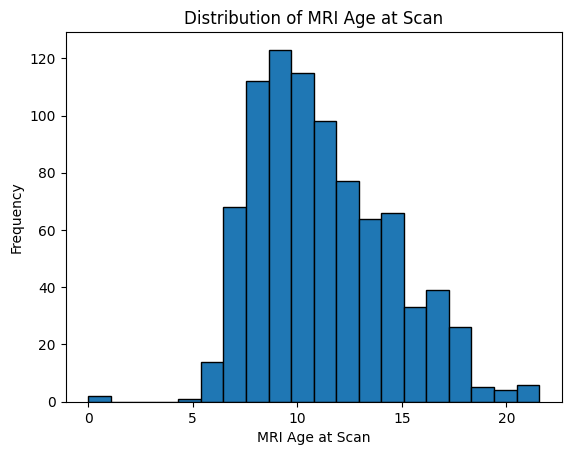

In [26]:
# handle null values. There are 360 NA MRI_Track_Age_at_Scan in quantitative, and 11 NA PreInt_Demos_Fam_Child_Ethnicity in categorical
print(df_quantitative['MRI_Track_Age_at_Scan'])
unique_MRI_age = df_quantitative['MRI_Track_Age_at_Scan'].unique()
print("num of rows: ", df_quantitative.shape[0])
print("unique MRI age:", unique_MRI_age.size)

non_na_mri_age = df_quantitative['MRI_Track_Age_at_Scan'].dropna()

plt.hist(non_na_mri_age, bins=20, edgecolor='black')
plt.xlabel('MRI Age at Scan')
plt.ylabel('Frequency')
plt.title('Distribution of MRI Age at Scan')
plt.show()

In [27]:
#finding median and mean of MRI age since the age are skewed to the right.
print("median: ", np.median(non_na_mri_age))
print("mean: ", np.mean(non_na_mri_age))

median:  10.739219
mean:  11.245678424384526


In [28]:
#using median since the available MRI age plot is skewed to the right
df_quantitative['MRI_Track_Age_at_Scan'].fillna(np.median(non_na_mri_age), inplace=True)
print(df_quantitative.isna().sum())

participant_id                0
EHQ_EHQ_Total                 0
ColorVision_CV_Score          0
APQ_P_APQ_P_CP                0
APQ_P_APQ_P_ID                0
APQ_P_APQ_P_INV               0
APQ_P_APQ_P_OPD               0
APQ_P_APQ_P_PM                0
APQ_P_APQ_P_PP                0
SDQ_SDQ_Conduct_Problems      0
SDQ_SDQ_Difficulties_Total    0
SDQ_SDQ_Emotional_Problems    0
SDQ_SDQ_Externalizing         0
SDQ_SDQ_Generating_Impact     0
SDQ_SDQ_Hyperactivity         0
SDQ_SDQ_Internalizing         0
SDQ_SDQ_Peer_Problems         0
SDQ_SDQ_Prosocial             0
MRI_Track_Age_at_Scan         0
dtype: int64


[0. 1. 3. 2.]


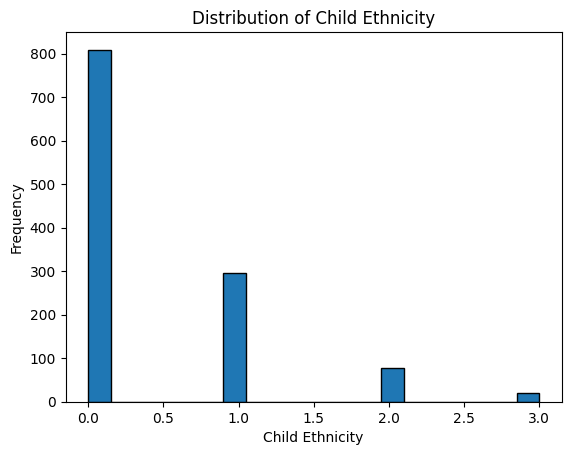

In [29]:
# handle 11 NA PreInt_Demos_Fam_Child_Ethnicity in categorical
child_ethnicity = df_categorical['PreInt_Demos_Fam_Child_Ethnicity'].dropna()
child_ethnicity_unique = child_ethnicity.unique()
print(child_ethnicity_unique)
# check distribution
plt.hist(child_ethnicity, bins=20, edgecolor='black')
plt.xlabel('Child Ethnicity')
plt.ylabel('Frequency')
plt.title('Distribution of Child Ethnicity')
plt.show()

0= Not Hispanic or Latino \\
1= Hispanic or Latino \\
2= Decline to specify \\
3= Unknown \\

In [30]:
# decline to specify and unknown is the same thing, so merge the 2 column together
df_categorical['PreInt_Demos_Fam_Child_Ethnicity'].replace(2, 3, inplace=True)

In [31]:
# since null value means not specifified. Replace all null with not specified.
df_categorical['PreInt_Demos_Fam_Child_Ethnicity'].fillna(3, inplace=True)
# check null value again
print(df_categorical.isna().sum())

participant_id                      0
PreInt_Demos_Fam_Child_Ethnicity    0
PreInt_Demos_Fam_Child_Race         0
dtype: int64


In [32]:
# merging the datasets (categorical, quantitative, functional)

print("categorical columns", df_categorical.columns)
print("quantitative columns", df_quantitative.columns)
print("functional columns", df_functional.columns)

categorical columns Index(['participant_id', 'PreInt_Demos_Fam_Child_Ethnicity',
       'PreInt_Demos_Fam_Child_Race'],
      dtype='object')
quantitative columns Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')
functional columns Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198th

In [33]:
# check if all the partiicpant ids are the same

#sort all the participant_id in each dataset
df_categorical['participant_id'] = df_categorical['participant_id'].sort_values()
df_quantitative['participant_id'] = df_quantitative['participant_id'].sort_values()
df_functional['participant_id'] = df_functional['participant_id'].sort_values()

In [34]:
print(df_categorical['participant_id'].equals(df_quantitative['participant_id']))
df_functional['participant_id_in_categorical'] = df_functional['participant_id'].isin(df_categorical['participant_id'])
if not df_functional['participant_id_in_categorical'].all():
    print("There are participant_id values in functional that are not in categorical.")
else:
    print("There are no participant_id values in functional that are not in categorical.")

True
There are no participant_id values in functional that are not in categorical.


In [35]:
# the participant_id in each datasets align -> ready to merge
merged_df = pd.merge(df_quantitative, df_categorical, on='participant_id', how='outer')
merged_df = pd.merge(merged_df, df_functional, on='participant_id', how='outer')
merged_df = pd.merge(merged_df, df_target, on='participant_id', how='outer')
merged_df.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,participant_id_in_categorical,ADHD_Outcome,Sex_F
0,00aIpNTbG5uh,100.00,13,3,15,44,14,20,27,3,...,0.032986,0.081980,0.093708,0.021903,0.029458,-0.016072,0.169368,True,1,0
1,00fV0OyyoLfw,92.27,14,3,12,35,25,28,30,5,...,-0.042040,0.125651,0.127045,0.142448,0.051943,0.138729,0.168951,True,1,0
2,04X1eiS79T4B,86.67,14,3,21,37,18,26,28,3,...,-0.057094,0.084471,0.075582,0.093687,0.091592,0.114817,0.157812,True,0,1
3,05ocQutkURd6,93.34,14,3,11,42,15,20,28,0,...,-0.029209,0.087122,0.009254,0.114800,0.218728,0.090305,0.159943,True,0,1
4,06YUNBA9ZRLq,0.00,14,8,12,35,22,12,24,6,...,-0.001515,0.166933,0.005170,0.005126,0.126259,-0.038223,0.181322,True,1,0


In [36]:
#check if null value exist in the list
na_check = merged_df.isna().sum()
if (na_check > 0).any():
  print("there are null values in merged_df")
else:
  print("there are no null values in merged_df")


there are no null values in merged_df


In [37]:
merged_df.drop("participant_id_in_categorical", axis=1, inplace=True)

In [38]:
# Create X and Y for modeling

# Y is the target (we need 2, ADHD and Sex)
# X is the rest of the columns except target

target_columns = df_target.columns
print(target_columns)

#dropping the target columns in X
X = merged_df.drop(['ADHD_Outcome', 'Sex_F'], axis=1)
participants_list = merged_df['participant_id']
print("X shape: ", X.shape)
print("length of participants_list: ", len(participants_list))

Index(['participant_id', 'ADHD_Outcome', 'Sex_F'], dtype='object')
X shape:  (1213, 19921)
length of participants_list:  1213


In [39]:
X.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19921)

In [40]:
# y training set for sex and ADHD
y_sex = merged_df['Sex_F']
y_adhd = merged_df['ADHD_Outcome']

### Model Building (original)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
participant_list = X['participant_id']
X = X.drop('participant_id', axis=1)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets (70% training, 30% test)
X_train, X_test, y_train_adhd, y_test_adhd, y_train_sex, y_test_sex = train_test_split(
    X_scaled, y_adhd, y_sex, test_size=0.3, random_state=1234)

# Build the model using Functional API
inputs = Input(shape=(X_train.shape[1],))  # Define input layer

# Shared hidden layers
x = Dense(512, activation='relu')(inputs)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)

# Output layers for ADHD and Sex
adhd_output = Dense(1, activation='sigmoid', name='adhd_output')(x)
sex_output = Dense(1, activation='sigmoid', name='sex_output')(x)

# Create the model
model = Model(inputs=inputs, outputs=[adhd_output, sex_output])

# Compile the model
model.compile(optimizer=Adam(),
              loss={'adhd_output': 'binary_crossentropy', 'sex_output': 'binary_crossentropy'},
              metrics={'adhd_output': 'accuracy', 'sex_output': 'accuracy'})

# Train the model
history = model.fit(X_train, [y_train_adhd, y_train_sex],
                    epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 225ms/step - adhd_output_accuracy: 0.6192 - adhd_output_loss: 0.7296 - loss: 1.4451 - sex_output_accuracy: 0.6208 - sex_output_loss: 0.7142 - val_adhd_output_accuracy: 0.6706 - val_adhd_output_loss: 0.6945 - val_loss: 1.2753 - val_sex_output_accuracy: 0.6176 - val_sex_output_loss: 0.6279
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 213ms/step - adhd_output_accuracy: 0.9464 - adhd_output_loss: 0.1452 - loss: 0.2341 - sex_output_accuracy: 0.9732 - sex_output_loss: 0.0885 - val_adhd_output_accuracy: 0.6176 - val_adhd_output_loss: 0.7596 - val_loss: 1.3455 - val_sex_output_accuracy: 0.7118 - val_sex_output_loss: 0.6527
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step - adhd_output_accuracy: 1.0000 - adhd_output_loss: 0.0053 - loss: 0.0152 - sex_output_accuracy: 0.9949 - sex_output_loss: 0.0099 - val_adhd_output_accuracy: 0.6412 - val_adhd_output_loss: 0.8373 - val_loss: 1.4351 - val_sex_output_accuracy: 0.7118 - val_sex_output_loss: 0.6790
Epoch 4/5

ValueError: too many values to unpack (expected 3)

In [ ]:
# Evaluate the model
result = model.evaluate(X_test, [y_test_adhd, y_test_sex])
test_loss = result[0]
test_adhd_loss = result[1]
test_sex_loss = result[2]
test_adhd_acc = result[3]
test_sex_acc = result[4]

print(f"Test Loss: {test_loss}")
print(f"Test Loss for ADHD: {test_adhd_loss}")
print(f"Test Loss for Sex: {test_sex_loss}")
print(f"Test Accuracy for ADHD: {test_adhd_acc}")
print(f"Test Accuracy for Sex: {test_sex_acc}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - adhd_output_accuracy: 0.6324 - adhd_output_loss: 0.8484 - loss: 1.8312 - sex_output_accuracy: 0.6517 - sex_output_loss: 0.9821
Test Loss: 1.7723755836486816
Test Loss for ADHD: 0.8836379051208496
Test Loss for Sex: 0.8840306401252747
Test Accuracy for ADHD: 0.6483516693115234
Test Accuracy for Sex: 0.6648351550102234


In [ ]:
from re import A
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_recall_curve

y_pred_adhd, y_pred_sex = model.predict(X_test)

def best_threshold(y_true, y_pred_prob):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_pred_prob)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
    best_thresh = thresholds[np.argmax(f1_scores)]  # Threshold with highest F1
    return best_thresh

# Find optimal thresholds
best_thresh_adhd = best_threshold(y_test_adhd, y_pred_adhd)
best_thresh_sex = best_threshold(y_test_sex, y_pred_sex)

print(f"Optimal Threshold for ADHD: {best_thresh_adhd:.3f}")
print(f"Optimal Threshold for Sex: {best_thresh_sex:.3f}")

# Predict on the test set
y_pred_adhd_bin = (y_pred_adhd > 0.2).astype(int)
y_pred_sex_bin = (y_pred_sex > 0.235).astype(int)

# Compute recall
recall_adhd = recall_score(y_test_adhd, y_pred_adhd_bin)
recall_sex = recall_score(y_test_sex, y_pred_sex_bin)

# Compute accuracy
A_adhd = accuracy_score(y_test_adhd, y_pred_adhd_bin)
A_sex = accuracy_score(y_test_sex, y_pred_sex_bin)

# Compute f1
f1_adhd = f1_score(y_test_adhd, y_pred_adhd_bin)
f1_sex = f1_score(y_test_sex, y_pred_sex_bin)

print(f"Recall for ADHD: {recall_adhd}")
print(f"Accuracy for ADHD: {A_adhd}")
print(f"F1 for ADHD: {f1_adhd}")
print('\n')
print(f"Recall for Sex: {recall_sex}")
print(f"Accuracy for Sex: {A_sex}")
print(f"F1 for Sex: {f1_sex}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Optimal Threshold for ADHD: 1.000
Optimal Threshold for Sex: 0.235
Recall for ADHD: 0.9260700389105059
Accuracy for ADHD: 0.6868131868131868
F1 for ADHD: 0.8067796610169492


Recall for Sex: 0.7258064516129032
Accuracy for Sex: 0.6153846153846154
F1 for Sex: 0.5625


In [ ]:
print(f"Shape of y_train_adhd: {y_train_adhd.shape}")
print(f"Shape of y_train_sex: {y_train_sex.shape}")

Shape of y_train_adhd: (849,)
Shape of y_train_sex: (849,)


### model building (attempt to increase accuracy)
- changed relu to leakyReLU to avoid dead neurons
- added dropout to prevent overfitting
- normalization to improve training stability

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets (70% training, 30% test)
X_train, X_test, y_train_adhd, y_test_adhd, y_train_sex, y_test_sex = train_test_split(
    X_scaled, y_adhd, y_sex, test_size=0.3, random_state=1234)

inputs = Input(shape=(X_train.shape[1],))

# Shared hidden layers
x = Dense(512)(inputs)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(0.3)(x)

x = Dense(256)(inputs)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(0.3)(x)

x = Dense(128)(inputs)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(0.3)(x)

# Output layers for ADHD and Sex
adhd_output = Dense(1, activation='sigmoid', name='adhd_output')(x)
sex_output = Dense(1, activation='sigmoid', name='sex_output')(x)

# Create the model
model = Model(inputs=inputs, outputs=[adhd_output, sex_output])

# Compile the model
model.compile(optimizer=Adam(),
              loss={'adhd_output': 'binary_crossentropy', 'sex_output': 'binary_crossentropy'},
              metrics={'adhd_output': 'accuracy', 'sex_output': 'accuracy'})

# Train the model
history = model.fit(X_train, [y_train_adhd, y_train_sex],
                    epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - adhd_output_accuracy: 0.4634 - adhd_output_loss: 1.0305 - loss: 1.9246 - sex_output_accuracy: 0.5310 - sex_output_loss: 0.8912 - val_adhd_output_accuracy: 0.5824 - val_adhd_output_loss: 1.4193 - val_loss: 2.7176 - val_sex_output_accuracy: 0.6765 - val_sex_output_loss: 1.3771
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - adhd_output_accuracy: 0.9148 - adhd_output_loss: 0.2166 - loss: 0.4042 - sex_output_accuracy: 0.9362 - sex_output_loss: 0.1876 - val_adhd_output_accuracy: 0.5588 - val_adhd_output_loss: 0.9124 - val_loss: 1.6954 - val_sex_output_accuracy: 0.7059 - val_sex_output_loss: 0.8317
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - adhd_output_accuracy: 0.9590 - adhd_output_loss: 0.1261 - loss: 0.2391 - sex_output_accuracy: 0.9787 - sex_output_loss: 0.1132 - val_adhd_output_accuracy: 0.5765 - val_adhd_output_loss: 0.7896 - val_loss: 1.4720 - val_sex_output_accuracy: 0.7176 - val_sex_output_loss: 0.7353
Epoch 4/50
22

In [ ]:
# Evaluate the model
result = model.evaluate(X_test, [y_test_adhd, y_test_sex])
test_loss = result[0]
test_adhd_loss = result[1]
test_sex_loss = result[2]
test_adhd_acc = result[3]
test_sex_acc = result[4]

print(f"Test Loss: {test_loss}")
print(f"Test Loss for ADHD: {test_adhd_loss}")
print(f"Test Loss for Sex: {test_sex_loss}")
print(f"Test Accuracy for ADHD: {test_adhd_acc}")
print(f"Test Accuracy for Sex: {test_sex_acc}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - adhd_output_accuracy: 0.6443 - adhd_output_loss: 0.7962 - loss: 1.5547 - sex_output_accuracy: 0.6742 - sex_output_loss: 0.7567
Test Loss: 1.5082907676696777
Test Loss for ADHD: 0.8078203797340393
Test Loss for Sex: 0.6883458495140076
Test Accuracy for ADHD: 0.6620879173278809
Test Accuracy for Sex: 0.7060439586639404


In [ ]:
from re import A
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_recall_curve

y_pred_adhd, y_pred_sex = model.predict(X_test)

def best_threshold(y_true, y_pred_prob):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_pred_prob)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
    best_thresh = thresholds[np.argmax(f1_scores)]  # Threshold with highest F1
    return best_thresh

# Find optimal thresholds
best_thresh_adhd = best_threshold(y_test_adhd, y_pred_adhd)
best_thresh_sex = best_threshold(y_test_sex, y_pred_sex)

print(f"Optimal Threshold for ADHD: {best_thresh_adhd:.3f}")
print(f"Optimal Threshold for Sex: {best_thresh_sex:.3f}")

# Predict on the test set
y_pred_adhd_bin = (y_pred_adhd > 0.2).astype(int)
y_pred_sex_bin = (y_pred_sex > 0.235).astype(int)

# Compute recall
recall_adhd = recall_score(y_test_adhd, y_pred_adhd_bin)
recall_sex = recall_score(y_test_sex, y_pred_sex_bin)

# Compute accuracy
A_adhd = accuracy_score(y_test_adhd, y_pred_adhd_bin)
A_sex = accuracy_score(y_test_sex, y_pred_sex_bin)

# Compute f1
f1_adhd = f1_score(y_test_adhd, y_pred_adhd_bin)
f1_sex = f1_score(y_test_sex, y_pred_sex_bin)

print(f"Recall for ADHD: {recall_adhd}")
print(f"Accuracy for ADHD: {A_adhd}")
print(f"F1 for ADHD: {f1_adhd}")
print('\n')
print(f"Recall for Sex: {recall_sex}")
print(f"Accuracy for Sex: {A_sex}")
print(f"F1 for Sex: {f1_sex}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Optimal Threshold for ADHD: 0.121
Optimal Threshold for Sex: 0.070
Recall for ADHD: 0.9727626459143969
Accuracy for ADHD: 0.7005494505494505
F1 for ADHD: 0.8210180623973727


Recall for Sex: 0.6209677419354839
Accuracy for Sex: 0.6538461538461539
F1 for Sex: 0.55


### Model Building seperate model for ADHD


In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [43]:
participant_list = X['participant_id']
X = X.drop('participant_id', axis=1)

In [152]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',   # or 'val_pr_auc' if you track AUC-PR
    patience=5,           # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore the best model weights
)

In [160]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_adhd, X_test_adhd, y_train_adhd, y_test_adhd = train_test_split(
    X_scaled, y_adhd, test_size=0.3, random_state=1234)

inputs = Input(shape=(X_train_adhd.shape[1],))

# Shared hidden layers
x = Dense(512)(inputs)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(0.3)(x)

x = Dense(256)(inputs)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(0.3)(x)

x = Dense(128)(inputs)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(0.3)(x)

# Output layer for ADHD
adhd_output = Dense(1, activation='sigmoid', name='adhd_output')(x)

model_adhd = Model(inputs=inputs, outputs=adhd_output)

model_adhd.compile(optimizer=Adam(),
              loss={'adhd_output': 'binary_crossentropy'},
              metrics={'adhd_output': 'accuracy'})

history_adhd = model_adhd.fit(X_train_adhd, y_train_adhd,
                    epochs=50, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stop])

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.5140 - loss: 0.9704 - val_accuracy: 0.5647 - val_loss: 1.5747
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9614 - loss: 0.1532 - val_accuracy: 0.5412 - val_loss: 1.0223
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9766 - loss: 0.0931 - val_accuracy: 0.5471 - val_loss: 0.8744
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9997 - loss: 0.0508 - val_accuracy: 0.5706 - val_loss: 0.8205
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9997 - loss: 0.0421 - val_accuracy: 0.5706 - val_loss: 0.7973
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 1.0000 - loss: 0.0300 - val_accuracy: 0.5824 - val_loss: 0.7766
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 1.0000 - loss: 0.0214 - val_accuracy: 0.5824 - val_loss: 0.7703
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 1.0000 - loss: 0.0256 - val_accuracy: 0.5824 - v

In [161]:
results_adhd = model_adhd.evaluate(X_test_adhd, y_test_adhd)
test_adhd_loss = results_adhd[0]
test_adhd_acc = results_adhd[1]

print(f"Test Loss for ADHD: {test_adhd_loss}")
print(f"Test Accuracy for ADHD: {test_adhd_acc}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6465 - loss: 0.6962
Test Loss for ADHD: 0.6887765526771545
Test Accuracy for ADHD: 0.6703296899795532


In [163]:
from re import A
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_recall_curve

y_pred_adhd = model_adhd.predict(X_test_adhd)

def best_threshold(y_true, y_pred_prob):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_pred_prob)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
    best_thresh = thresholds[np.argmax(f1_scores)]  # Threshold with highest F1
    return best_thresh

# Find optimal thresholds
best_thresh_adhd = best_threshold(y_test_adhd, y_pred_adhd)

print(f"Optimal Threshold for ADHD: {best_thresh_adhd:.3f}")

# Predict on the test set
y_pred_adhd_bin = (y_pred_adhd > 0.044).astype(int)

# Compute recall
recall_adhd = recall_score(y_test_adhd, y_pred_adhd_bin)

# Compute accuracy
A_adhd = accuracy_score(y_test_adhd, y_pred_adhd_bin)

# Compute f1
f1_adhd = f1_score(y_test_adhd, y_pred_adhd_bin)

print(f"Recall for ADHD: {recall_adhd}")
print(f"Accuracy for ADHD: {A_adhd}")
print(f"F1 for ADHD: {f1_adhd}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Optimal Threshold for ADHD: 0.044
Recall for ADHD: 1.0
Accuracy for ADHD: 0.7060439560439561
F1 for ADHD: 0.8276972624798712


### neural network model for sex

In [134]:
from sklearn.utils import class_weight

X_train_sex, X_test_sex, y_train_sex, y_test_sex = train_test_split(
    X_scaled, y_sex, test_size=0.3, random_state=1234)

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_sex),
    y=y_train_sex
)

class_weights = dict(enumerate(class_weights))
print(class_weights)

{0: np.float64(0.7621184919210053), 1: np.float64(1.4537671232876712)}


In [133]:
# focal loss implemented to handle hard-to-classify data
import tensorflow.keras.backend as K

def focal_loss(gamma=2., alpha=.25):
    def focal_loss_fixed(y_true, y_pred):
        bce = K.binary_crossentropy(y_true, y_pred)
        bce_exp = K.exp(-bce)
        return K.mean(alpha * (1 - bce_exp) ** gamma * bce)
    return focal_loss_fixed

In [135]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',   # or 'val_pr_auc' if you track AUC-PR
    patience=5,           # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore the best model weights
)

In [123]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

In [136]:
X_train_sex, X_test_sex, y_train_sex, y_test_sex = train_test_split(
    X_scaled, y_sex, test_size=0.3, random_state=1234)

inputs_sex = Input(shape=(X_train_sex.shape[1],))

# Shared hidden layers

x_sex = Dense(512)(inputs_sex)
x_sex = BatchNormalization()(x_sex)
x_sex = LeakyReLU()(x_sex)
x_sex = Dropout(0.3)(x_sex)

x_sex = Dense(256)(inputs_sex)
x_sex = BatchNormalization()(x_sex)
x_sex = LeakyReLU()(x_sex)
x_sex = Dropout(0.3)(x_sex)

x_sex = Dense(128)(inputs_sex)
x_sex = BatchNormalization()(x_sex)
x_sex = LeakyReLU()(x_sex)
x_sex = Dropout(0.3)(x_sex)

sex_output = Dense(1, activation='sigmoid', name='sex_output')(x_sex)

model_sex = Model(inputs=inputs_sex, outputs=sex_output)

model_sex.compile(optimizer=Adam(),
              loss={'sex_output': 'binary_crossentropy'},
              metrics={'sex_output': 'accuracy'})

history_sex = model_sex.fit(X_train_sex, y_train_sex,
                    epochs=50, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stop])

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.6353 - loss: 0.7842 - val_accuracy: 0.6529 - val_loss: 1.2731
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9259 - loss: 0.1888 - val_accuracy: 0.6529 - val_loss: 0.7840
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9720 - loss: 0.1090 - val_accuracy: 0.6882 - val_loss: 0.6865
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9915 - loss: 0.0610 - val_accuracy: 0.6882 - val_loss: 0.6580
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9991 - loss: 0.0270 - val_accuracy: 0.6824 - val_loss: 0.6436
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 1.0000 - loss: 0.0289 - val_accuracy: 0.6824 - val_loss: 0.6353
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 1.0000 - loss: 0.0223 - val_accuracy: 0.6882 - val_loss: 0.6364
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 1.0000 - loss: 0.0167 - val_accuracy: 0.7000 - v

In [130]:
results_sex = model_adhd.evaluate(X_test_sex, y_test_sex)
test_sex_loss = results_sex[0]
test_sex_acc = results_sex[1]

print(f"Test Loss for ADHD: {test_sex_loss}")
print(f"Test Accuracy for ADHD: {test_sex_acc}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3643 - loss: 1.8243
Test Loss for ADHD: 1.8552056550979614
Test Accuracy for ADHD: 0.3681318759918213


In [137]:
from re import A
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_recall_curve

y_pred_sex = model_sex.predict(X_test_sex)

def best_threshold(y_true, y_pred_prob):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_pred_prob)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
    best_thresh = thresholds[np.argmax(f1_scores)]  # Threshold with highest F1
    return best_thresh

# Find optimal thresholds
best_thresh_adhd = best_threshold(y_test_sex, y_pred_sex)

print(f"Optimal Threshold for sex: {best_thresh_adhd:.3f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Optimal Threshold for sex: 0.246


In [138]:
# Predict on the test set
y_pred_sex_bin = (y_pred_sex > 0.246).astype(int)

# Compute recall
recall_sex = recall_score(y_test_sex, y_pred_sex_bin)

# Compute accuracy
A_sex = accuracy_score(y_test_sex, y_pred_sex_bin)

# Compute f1
f1_sex = f1_score(y_test_sex, y_pred_sex_bin)

print(f"Recall for ADHD: {recall_sex}")
print(f"Accuracy for ADHD: {A_sex}")
print(f"F1 for ADHD: {f1_sex}")

Recall for ADHD: 0.782258064516129
Accuracy for ADHD: 0.6043956043956044
F1 for ADHD: 0.5739644970414202


### Test Dataset Import

In [164]:
df_categorical_test = pd.read_excel('/content/drive/MyDrive/WiDS/TEST_CATEGORICAL.xlsx')
df_functional_test = pd.read_csv('/content/drive/MyDrive/WiDS/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv')
df_quantitative_test = pd.read_excel('/content/drive/MyDrive/WiDS/TEST_QUANTITATIVE_METADATA.xlsx')

### Test Dataset Feature Engineering

In [140]:
df_categorical.columns

Index(['participant_id', 'PreInt_Demos_Fam_Child_Ethnicity',
       'PreInt_Demos_Fam_Child_Race'],
      dtype='object')

In [141]:
#df_categorical check
df_categorical_test.isna().sum()

,0
participant_id,0
Basic_Demos_Enroll_Year,0
Basic_Demos_Study_Site,0
PreInt_Demos_Fam_Child_Ethnicity,3
PreInt_Demos_Fam_Child_Race,6
MRI_Track_Scan_Location,0
Barratt_Barratt_P1_Edu,1
Barratt_Barratt_P1_Occ,1
Barratt_Barratt_P2_Edu,36
Barratt_Barratt_P2_Occ,42


In [ ]:
df_categorical_test = df_categorical_test[df_categorical.columns]
print(df_categorical_test.columns)
df_categorical_test.isna().sum()

Index(['participant_id', 'PreInt_Demos_Fam_Child_Ethnicity',
       'PreInt_Demos_Fam_Child_Race'],
      dtype='object')


,0
participant_id,0
PreInt_Demos_Fam_Child_Ethnicity,3
PreInt_Demos_Fam_Child_Race,6


In [ ]:
#handle the ethnicity the same way as training model
df_categorical_test['PreInt_Demos_Fam_Child_Ethnicity'].replace(2, 3, inplace=True)
df_categorical_test['PreInt_Demos_Fam_Child_Ethnicity'].fillna(3, inplace=True)

In [ ]:
print(df_categorical_test['PreInt_Demos_Fam_Child_Race'].unique())
print(df_categorical_test['PreInt_Demos_Fam_Child_Race'].value_counts())

[ 0.  1.  2.  8.  3. 11.  4.  9.  7.]
PreInt_Demos_Fam_Child_Race
0.0     174
8.0      55
1.0      28
2.0      23
3.0      12
11.0      7
9.0       3
4.0       1
7.0       1
Name: count, dtype: int64


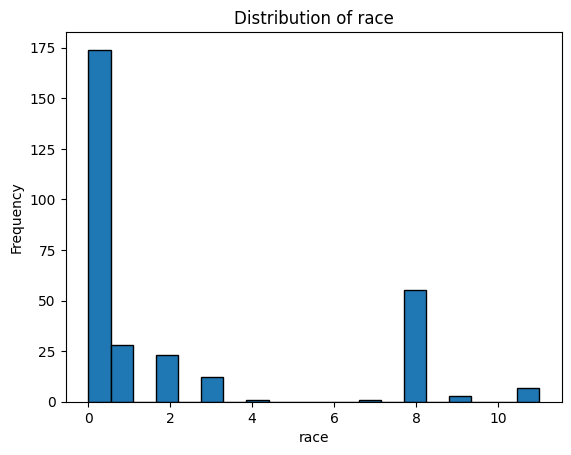

In [ ]:
non_na_race = df_categorical_test['PreInt_Demos_Fam_Child_Race'].dropna()

plt.hist(non_na_race, bins=20, edgecolor='black')
plt.xlabel('race')
plt.ylabel('Frequency')
plt.title('Distribution of race')
plt.show()

In [ ]:
print("median of race: ", non_na_race.median())
print("mean of race: ", non_na_race.mean())

median of race:  0.0
mean of race:  2.1875


In [ ]:
df_categorical_test['PreInt_Demos_Fam_Child_Race'].fillna(0, inplace=True)

In [ ]:
df_categorical_test.isna().sum()

,0
participant_id,0
PreInt_Demos_Fam_Child_Ethnicity,0
PreInt_Demos_Fam_Child_Race,0


In [ ]:
#fixing quantitative null
df_quantitative_test.isna().sum()

,0
participant_id,0
EHQ_EHQ_Total,1
ColorVision_CV_Score,9
APQ_P_APQ_P_CP,15
APQ_P_APQ_P_ID,15
APQ_P_APQ_P_INV,15
APQ_P_APQ_P_OPD,15
APQ_P_APQ_P_PM,15
APQ_P_APQ_P_PP,15
SDQ_SDQ_Conduct_Problems,30


EHQ_EHQ_Total
 100.05    49
 93.38     27
 66.70     18
 86.71     16
 73.37     15
           ..
 14.47      1
 76.77      1
 13.34      1
 23.34      1
-26.68      1
Name: count, Length: 87, dtype: int64
[  60.03   86.71   26.68   93.38  -93.38   95.65   46.69  100.05  -66.7
   67.83   62.3    96.72   48.96   73.37   72.3     0.     33.35   92.31
   83.44   46.76  -68.97 -100.05   58.96   56.7    70.03   84.51   91.18
  -75.64   63.37   66.7    90.05   53.36    4.47   88.98   51.16  -43.35
   80.04  -13.34   54.49  -52.29   64.5    76.7    38.95   20.01   71.17
   77.84  -83.38  -73.37   78.97   47.82   82.24   40.02   12.21   -6.67
   75.64   61.23  -53.36   14.47   76.77   13.34   23.34  -16.68    6.67
   83.38  -65.63     nan  -80.04  -70.03   94.51   80.11   74.5    56.76
  -20.01   82.31  -82.31  -60.03  -71.17   61.16   41.15   43.35   55.69
  -97.85    1.13   37.82   57.83  -24.48   87.84  -26.68]


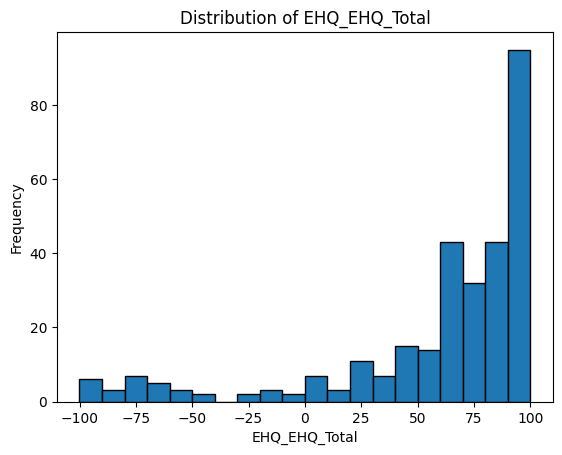

In [ ]:
print(df_quantitative_test['EHQ_EHQ_Total'].value_counts())
print(df_quantitative_test['EHQ_EHQ_Total'].unique())
non_na_EHQ = df_quantitative_test['EHQ_EHQ_Total'].dropna()
plt.hist(non_na_EHQ, bins=20, edgecolor='black')
plt.xlabel('EHQ_EHQ_Total')
plt.ylabel('Frequency')
plt.title('Distribution of EHQ_EHQ_Total')
plt.show()

In [ ]:
df_quantitative_test['EHQ_EHQ_Total'].fillna(non_na_EHQ.median(), inplace=True)

In [ ]:
df_quantitative_test['ColorVision_CV_Score'].value_counts()


,count
ColorVision_CV_Score,
14.0,194
13.0,62
12.0,27
1.0,3
11.0,2
9.0,2
2.0,1
5.0,1
4.0,1


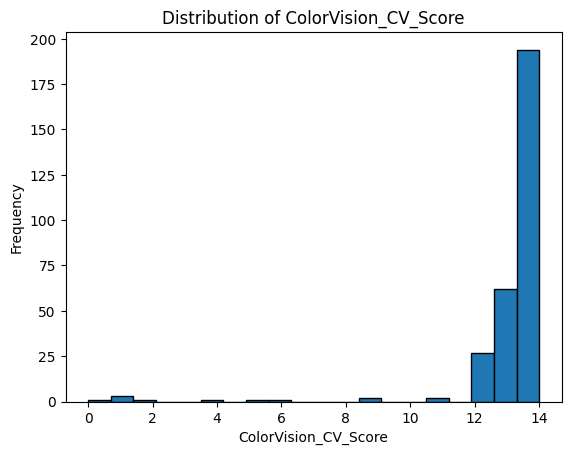

In [ ]:
plt.hist(df_quantitative_test['ColorVision_CV_Score'].dropna(), bins=20, edgecolor='black')
plt.xlabel('ColorVision_CV_Score')
plt.ylabel('Frequency')
plt.title('Distribution of ColorVision_CV_Score')
plt.show()

In [ ]:
df_quantitative_test['ColorVision_CV_Score'].fillna(df_quantitative_test['ColorVision_CV_Score'].median(), inplace=True)

In [ ]:
df_quantitative_test.isna().sum()

,0
participant_id,0
EHQ_EHQ_Total,0
ColorVision_CV_Score,0
APQ_P_APQ_P_CP,15
APQ_P_APQ_P_ID,15
APQ_P_APQ_P_INV,15
APQ_P_APQ_P_OPD,15
APQ_P_APQ_P_PM,15
APQ_P_APQ_P_PP,15
SDQ_SDQ_Conduct_Problems,30


In [ ]:
quantitative_na_cols = df_quantitative_test.columns[df_quantitative_test.isna().any()]
print(quantitative_na_cols)

Index(['APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial'],
      dtype='object')


In [ ]:
for col in quantitative_na_cols:
  df_quantitative_test[col].fillna(df_quantitative_test[col].median(), inplace=True)

In [ ]:
df_quantitative_test.isna().sum()

,0
participant_id,0
EHQ_EHQ_Total,0
ColorVision_CV_Score,0
APQ_P_APQ_P_CP,0
APQ_P_APQ_P_ID,0
APQ_P_APQ_P_INV,0
APQ_P_APQ_P_OPD,0
APQ_P_APQ_P_PM,0
APQ_P_APQ_P_PP,0
SDQ_SDQ_Conduct_Problems,0


### Test dataset merging + model fitting

In [143]:
merged_test_df = pd.merge(df_quantitative_test, df_categorical_test, on='participant_id', how='outer')
merged_test_df = pd.merge(merged_test_df, df_functional_test, on='participant_id', how='outer')
participant_ids_test = merged_test_df['participant_id']

In [144]:
X_test_set = merged_test_df[X.columns]

In [145]:
X_test_set.shape

(304, 19920)

In [147]:
X_test.shape

NameError: name 'X_test' is not defined

In [ ]:
X_test_set.isna().sum()

,0
EHQ_EHQ_Total,0
ColorVision_CV_Score,0
APQ_P_APQ_P_CP,0
APQ_P_APQ_P_ID,0
APQ_P_APQ_P_INV,0
...,...
196throw_198thcolumn,0
196throw_199thcolumn,0
197throw_198thcolumn,0
197throw_199thcolumn,0


In [ ]:
X_test_set_scaled = scaler.fit_transform(X_test_set)
adhd_test_predictions, sex_test_predictions = model.predict(X_test_set_scaled)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [ ]:
adhd_test_predictions_label = (adhd_test_predictions > 0.121).astype(int)
sex_test_predictions_label = (sex_test_predictions > 0.07).astype(int)

In [ ]:
print(len(adhd_test_predictions))
print(len(sex_test_predictions))
print(len(participant_ids_test))

304
304
304


In [ ]:
test_results_df = pd.DataFrame({
    'participant_id': participant_ids_test,
    'ADHD_Outcome': adhd_test_predictions_label.flatten(),
    'Sex_F': sex_test_predictions_label.flatten()
})

In [ ]:
test_results_df.head(30)

,participant_id,ADHD_Outcome,Sex_F
0,06HFIpqKfXy9,1,1
1,0Dua0TUw4sNZ,1,0
2,0ImS6uhE3Ie9,1,1
3,0VHL9SCh2TfC,1,1
4,0X2H4LroxZcw,1,0
5,0idudG3MZeOR,1,0
6,0joIpvJZmHlM,1,0
7,0wdp92SlZ6os,1,1
8,19mb5yGJigtw,1,0
9,1j28gfEoCQ3o,1,1


### Orignal test dataset handling

In [165]:
merged_test_df = pd.merge(df_quantitative_test, df_categorical_test, on='participant_id', how='outer')
merged_test_df = pd.merge(merged_test_df, df_functional_test, on='participant_id', how='outer')
participant_ids_test = merged_test_df['participant_id']

In [166]:
# QUICK FIX OF FILL NA
X_test_set = X_test_set.fillna(X_test_set.mean())

X_test_set.fillna({'MRI_Track_Age_at_Scan': X['MRI_Track_Age_at_Scan'].median()}, inplace = True)
X_test_set.fillna({'PreInt_Demos_Fam_Child_Ethnicity': X['PreInt_Demos_Fam_Child_Ethnicity'].mean()}, inplace = True)

X_test_set.head()
X_test_set.isna().sum()

,0
EHQ_EHQ_Total,0
ColorVision_CV_Score,0
APQ_P_APQ_P_CP,0
APQ_P_APQ_P_ID,0
APQ_P_APQ_P_INV,0
...,...
196throw_198thcolumn,0
196throw_199thcolumn,0
197throw_198thcolumn,0
197throw_199thcolumn,0


In [167]:
X_test_set_scaled = scaler.fit_transform(X_test_set)

adhd_test_predictions = model_adhd.predict(X_test_set_scaled)
sex_test_predictions = model_sex.predict(X_test_set_scaled)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [168]:
adhd_test_predictions_label = (adhd_test_predictions > 0.044).astype(int)
sex_test_predictions_label = (sex_test_predictions > 0.246).astype(int)

In [169]:
print(len(adhd_test_predictions))
print(len(sex_test_predictions))
print(len(participant_ids_test))

304
304
304


In [170]:
test_results_df = pd.DataFrame({
    'participant_id': participant_ids_test,
    'ADHD_Outcome': adhd_test_predictions_label.flatten(),
    'Sex_F': sex_test_predictions_label.flatten()
})

In [171]:
test_results_df.head(30)

,participant_id,ADHD_Outcome,Sex_F
0,06HFIpqKfXy9,1,1
1,0Dua0TUw4sNZ,1,0
2,0ImS6uhE3Ie9,1,1
3,0VHL9SCh2TfC,1,1
4,0X2H4LroxZcw,1,0
5,0idudG3MZeOR,1,0
6,0joIpvJZmHlM,1,0
7,0wdp92SlZ6os,1,1
8,19mb5yGJigtw,1,0
9,1j28gfEoCQ3o,1,1


### Outputting result

In [172]:
test_results_df.to_csv('/content/drive/MyDrive/WiDS/neuralNetwork_seperate_model_forADHD_SEX.csv', index=False)